# Comparison between Indivisual, Bagging and Boosting Algorithems

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [4]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [19]:
x=df.drop('cut',axis=1)
y=df['cut']

In [20]:
le=LabelEncoder()
for col in x.columns:
    if x[col].dtype=='category':
        x[col]=le.fit_transform(x[col])

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   color    53940 non-null  int32  
 2   clarity  53940 non-null  int32  
 3   depth    53940 non-null  float64
 4   table    53940 non-null  float64
 5   price    53940 non-null  int64  
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
dtypes: float64(6), int32(2), int64(1)
memory usage: 3.3 MB


In [22]:
y=le.fit_transform(y)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:

# train dicision Tree model
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
#avaluate the model
y_pred=DT.predict(x_test)

print('accuracy_score: ',accuracy_score(y_pred,y_test))
print('precision_score: ',precision_score(y_pred,y_test,average='micro'))
print('recall_score: ',recall_score(y_pred,y_test,average='micro'))
print('f1_score: ',f1_score(y_pred,y_test,average='micro'))

accuracy_score:  0.7058769002595476
precision_score:  0.7058769002595476
recall_score:  0.7058769002595476
f1_score:  0.7058769002595476


In [36]:
# train Random forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average='micro'))
print('recall_score',recall_score(y_test,y_pred,average='micro'))
print('f1_score',f1_score(y_test,y_pred,average='micro'))

accuracy_score 0.7861512791991101
precision_score 0.7861512791991101
recall_score 0.7861512791991101
f1_score 0.7861512791991102


In [40]:
#Train XGboost Classifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average='micro'))
print('recall_score',recall_score(y_test,y_pred,average='micro'))
print('f1_score',f1_score(y_test,y_pred,average='micro'))

accuracy_score 0.7974601408972933
precision_score 0.7974601408972933
recall_score 0.7974601408972933
f1_score 0.7974601408972933


Text(0.5, 1.0, 'DecisionTreeClassifier')

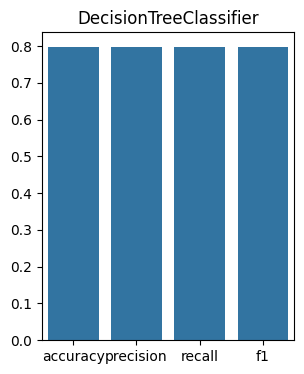

In [53]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.barplot(x=['accuracy','precision','recall','f1'],y=[accuracy_score(y_test,y_pred),precision_score(y_test,y_pred,average='micro'),recall_score(y_test,y_pred,average='micro'),f1_score(y_test,y_pred,average='micro')])
plt.title('DecisionTreeClassifier')